# Paquetes<br/>

In [ ]:
## Paquetes
library(colorRamps)
library(cowplot)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(GOplot)
library(grid)
library(gridExtra)
library(IRdisplay)
library(plyr)
library(RColorBrewer)
library(reshape2)
library(RSVGTipsDevice)
library(scales)
library(shiny)
library(shinythemes)
library(UpSetR)
library(venneuler)
library(wesanderson)
library(VennDiagram)
library(tidyr)

## Arreglos para los graficos<br/>

In [ ]:
## configuracion del fondo y bordes para los graficos pie chart y bar plot
pie_blank_theme = theme_minimal()+
  theme(
  axis.text.x=element_blank(),
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.border = element_blank(),
  panel.grid=element_blank(),
  axis.ticks = element_blank(),
  )
bar_blank_theme = theme(
axis.ticks.y=element_blank(),
panel.background = element_rect(fill = "white"),#cambia el color del fondo del grafico
axis.ticks = element_blank(), # elimina las marcas en la linea de escala de los ejes x y
axis.text.x = element_blank(),#elimina la escala del eje x
axis.line=element_blank(),
axis.ticks.x=element_blank(),
)

In [ ]:
colors=c(brewer.pal(12,"Set3"),brewer.pal(8,"Set2"),brewer.pal(12,"Paired"),brewer.pal(8,"Dark2"),
         brewer.pal(8,"Accent"),brewer.pal(12,"Set3"),brewer.pal(8,"Set2"),brewer.pal(12,"Paired"),
         brewer.pal(8,"Dark2"),brewer.pal(8,"Accent"),brewer.pal(12,"Set3"),brewer.pal(8,"Set2"),
         brewer.pal(12,"Paired"),brewer.pal(8,"Dark2"),brewer.pal(8,"Accent"))

In [51]:
dir.create('plots') ## creamos un directorio donde se depositaran los graficos creados

# Plot 1: Pie chart Proteins with and without GO number<br/>

In [45]:
anotadas=read.csv("./results/Anotadas.csv",header =F)
anotadas

V1,V2
Without GO,4
Whith GO,19


In [46]:
colnames(anotadas)=c("Annoted","Value") ## para cambiar la etiqueta del data frame 
total_anotadas=sum(anotadas$Value)
total_anotadas

[1] 23

In [47]:
anotadas

Annoted,Value
Without GO,4
Whith GO,19


In [48]:
annoted = anotadas %>% 
mutate(Annoted=factor(Annoted,levels=Annoted[length(Annoted):1]),
cumulative=cumsum(Value),
midpoint=cumulative - (Value/2),
labels=paste0(round((Value/sum(Value))*100,1),"%"))

In [49]:
annoted

Annoted,Value,cumulative,midpoint,labels
Without GO,4,4,2.0,17.4%
Whith GO,19,23,13.5,82.6%


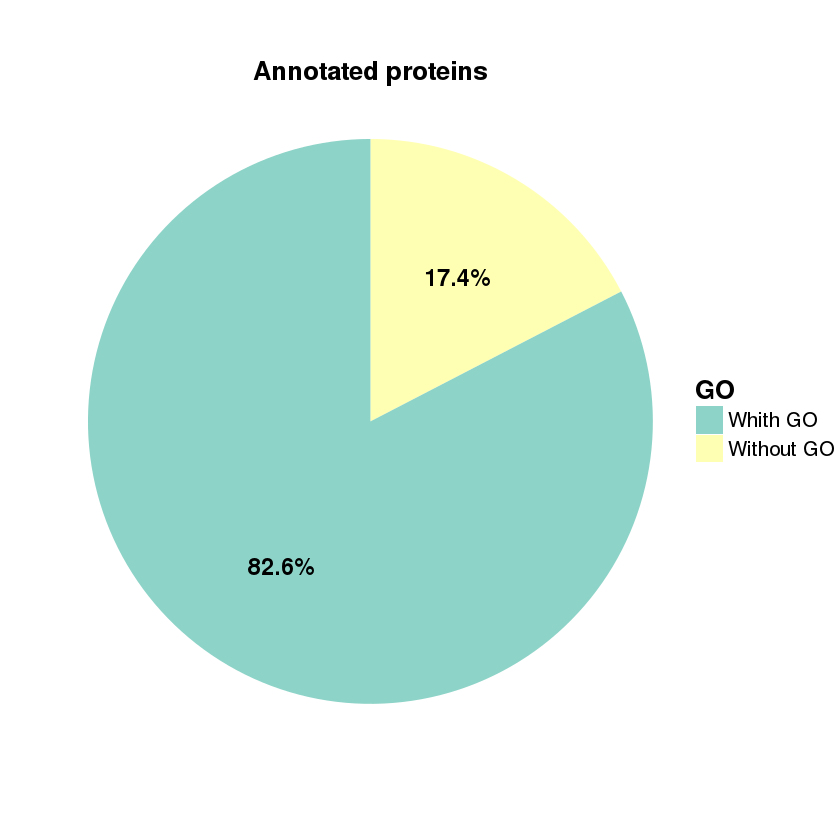

In [52]:
annoted = anotadas %>% 
mutate(Annoted=factor(Annoted,levels=Annoted[length(Annoted):1]),
cumulative=cumsum(Value),
midpoint=cumulative - (Value/2),
labels=paste0(round((Value/sum(Value))*100,1),"%"))
#labels=paste0(round((Value/sum(Value))*100,1),"%"," (",Value,") ")) ## agrega el numero
#table_labels  ## activar para visualizar 
con_y_sin_GO=ggplot(annoted, aes(x = "", y = Value,fill = Annoted))+
pie_blank_theme+
geom_bar(width = 1,stat = "identity")+
coord_polar(theta = "y",start = 0)+
scale_fill_manual(values = colors)+
#scale_fill_brewer(palette = "Paired")+
#scale_fill_manual(values = color) +
labs(x = "",y = "",title = "Annotated proteins",fill="GO")+
geom_text(aes(x = 1.1, y = midpoint,label = labels),color="black",
fontface = "bold",size = 5)+ # tipo de fuente, tamaño texto de serie de daos
theme(plot.title = element_text(hjust =0.5,size=15,margin=margin(b =-10,unit="pt"),face="bold"),# posicion,tamaño del titulo, y espacio entre el titulo y el grafico,
legend.text=element_text(colour="black",size=12),#color y tamaño del texto de la leyenda
legend.margin=margin(b = c(0,-1), unit = "cm"),#distancia entre la leyenda y el grafico
legend.title = element_text(hjust = 0.5,face="bold",size = 15)) # titulo de la leyenda
ggsave("./plots/Annoted_proteins.png",width=7,height=7,dpi=600)#,compression='lzw')#guarda y reedita la figura guardada cada vez que se hacen cambios y se ejecuta el comando
con_y_sin_GO

# Plot 2: Pie chart Total GO terms for C F P<br/>

In [53]:
frec_CFP=read.csv("./results/Total_categories_CFP.csv",header =F)
frec_CFP

V1,V2
F,17
C,10
P,15


In [54]:
colnames(frec_CFP)=c("Aspect","Value") ## para cambiar la etiqueta del data frame 
#total_CFP=sum(frec_CFP$Value)
#total_CFP
frec_CFP

Aspect,Value
F,17
C,10
P,15


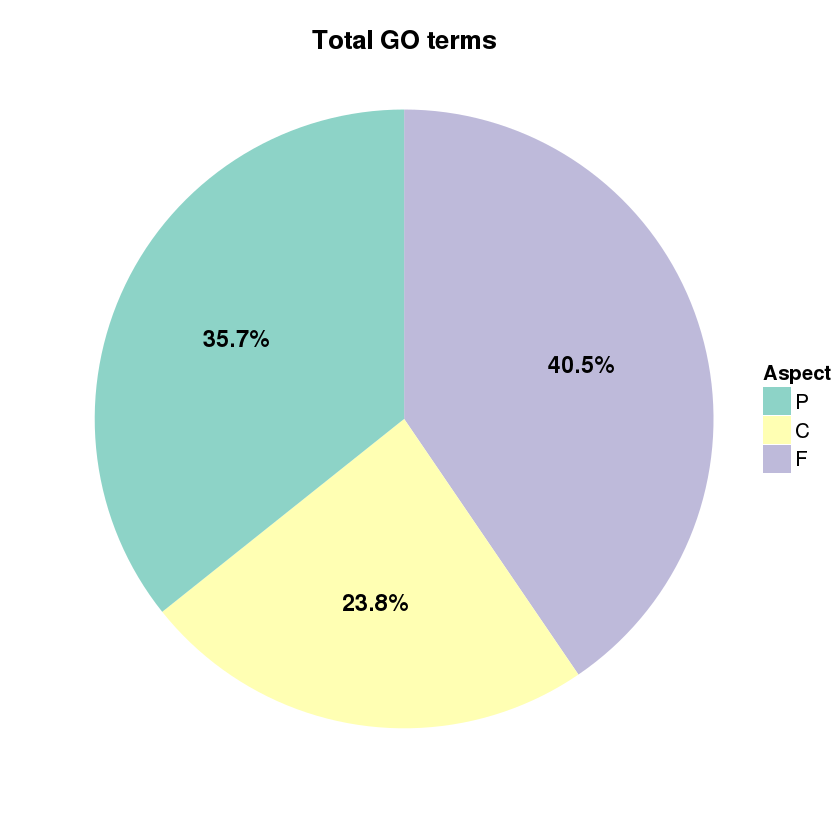

In [55]:
total_CFP = frec_CFP %>% 
mutate(Aspect=factor(Aspect,levels=Aspect[length(Aspect):1]),
      cumulative=cumsum(Value),
      midpoint=cumulative - (Value/2),
      #labels=paste0(round((Value/sum(Value))*100,1),"%"))
      #labels=paste0(round((Value/sum(Value))*100,1),"%"," (",Value,") "))
      labels=paste0(round((Value/sum(Value))*100,1),"%"))
#table_labels  ## activar para visualizar 
total_CFP_secretoma=ggplot(total_CFP, aes(x = "", y = Value,fill =Aspect))+
pie_blank_theme+
geom_bar(width = 1,stat = "identity")+
        coord_polar(theta = "y",start = 0)+
scale_fill_manual(values = colors)+
        #scale_fill_brewer(palette = "Paired")+
        #scale_fill_manual(values = color) +
        labs(x = "",y = "",title = "Total GO terms",fill="Aspect")+
geom_text(aes(x = 1.1, y = midpoint,label = labels),color="black",
          fontface = "bold",size = 5)+
theme(plot.title = element_text(hjust =0.5,,size=15,margin=margin(b =-10,unit="pt"),face="bold"),
legend.text=element_text(colour="black",size=12),#color y tamaño del texto de la leyenda
legend.margin=margin(b = c(0,-1), unit = "cm"),#distancia entre la leyenda y el grafico
legend.title = element_text(hjust = 0.5,face="bold",size = 12))
ggsave("./plots/Total_categories_CFP.png",width=7,height=7,dpi=600)
total_CFP_secretoma

# Intersecciones

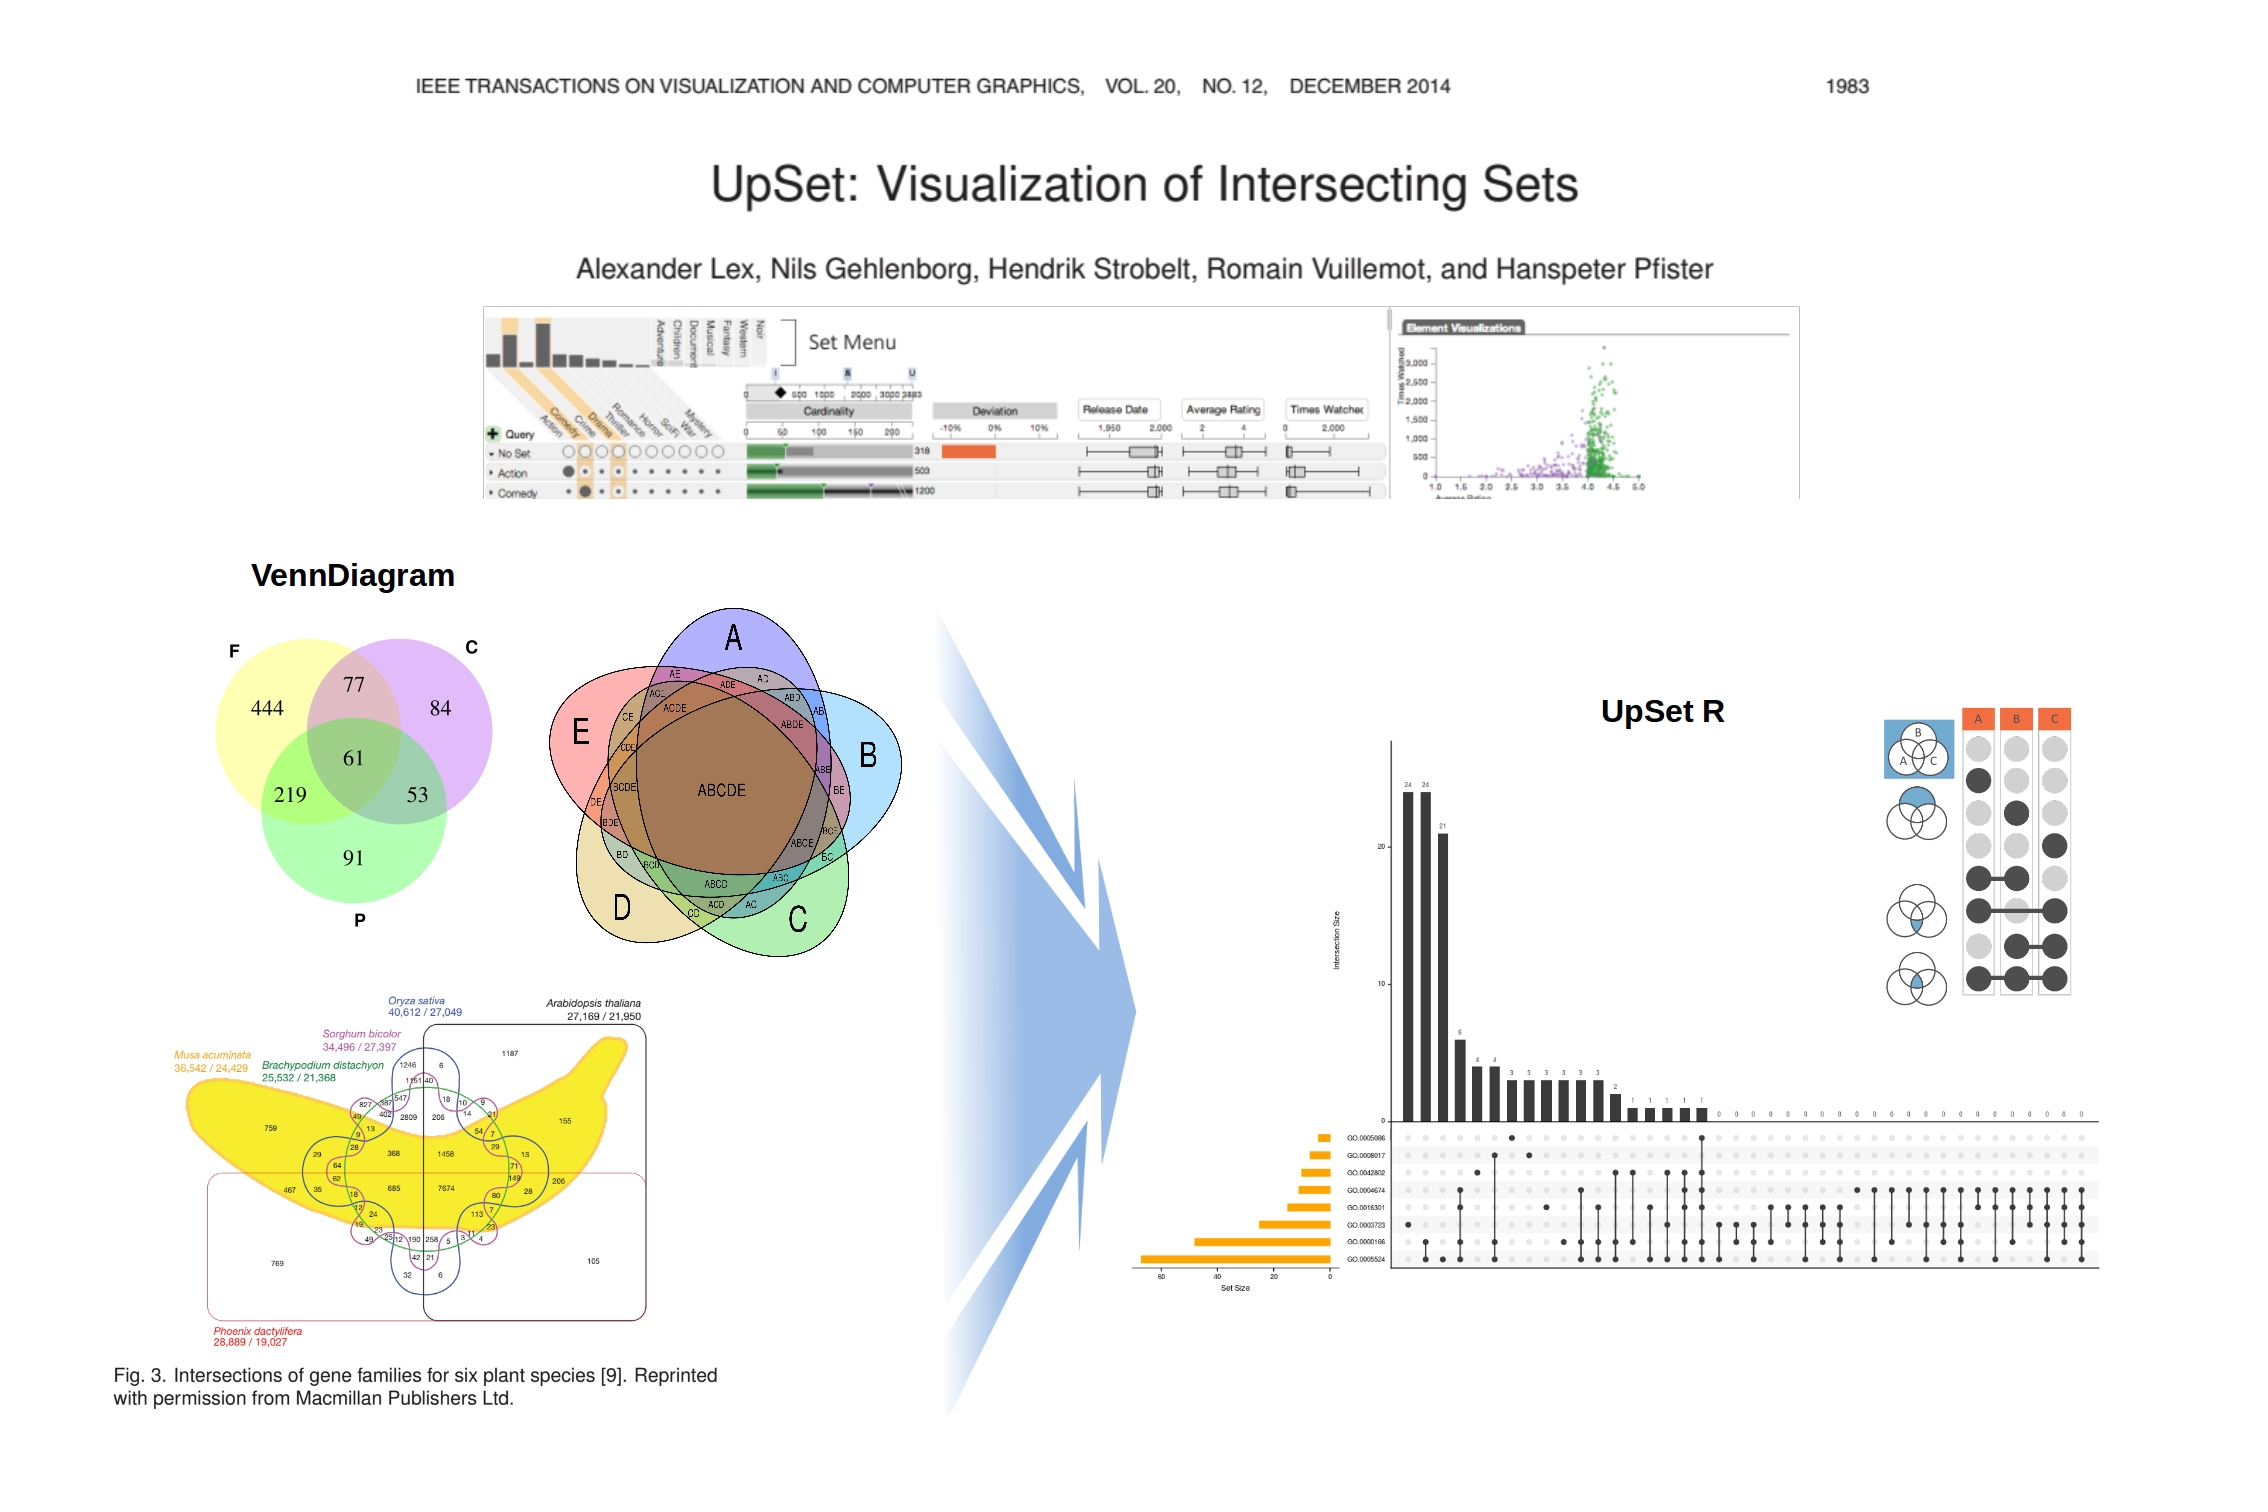

In [56]:
display_jpeg(RCurl::getBinaryURL('https://raw.githubusercontent.com/eduardo1011/Programas/master/interactios.jpg'))

# Plot 3: Venn Diagram for F C P<br/>

In [57]:
cats=read.csv("./results/cats.csv",header=TRUE)
head(cats)

Process,Function,Component
NA,1001070759,NA
NA,1001070759,NA
NA,1001070759,NA
NA,1001070755,NA
NA,1001070755,NA
NA,1001070755,NA


In [58]:
procc=dplyr::filter(cats,  !is.na(Process))
proceso=as.character(procc$Process)
funcc=dplyr::filter(cats,  !is.na(Function))
funcion=as.character(funcc$Function)
compp=dplyr::filter(cats,  !is.na(Component))
componente=as.character(compp$Component)

In [59]:
## Una forma de visualizar las agrupaciones
overlapping = calculate.overlap(x= list("funcion" = funcion,"componente" = componente,"proceso"=proceso));
overlapping   ##<<<<< activar la orden para ver la distribucion de los conjuntos

$a5
[1] "1001070755" "1001070753" "1001070747" "1001070738" "1001070732"
[6] "1001070731" "1001070719" "1001070715"

$a2
character(0)

$a4
[1] "1001070752" "1001070751" "1001070750" "1001070749" "1001070737"

$a6
[1] "1001070714" "1001070713"

$a1
 [1] "1001070759" "1001070759" "1001070759" "1001070736" "1001070736"
 [6] "1001070735" "1001070735" "1001070730" "1001070730" "1001070730"

$a3
character(0)

$a7
character(0)

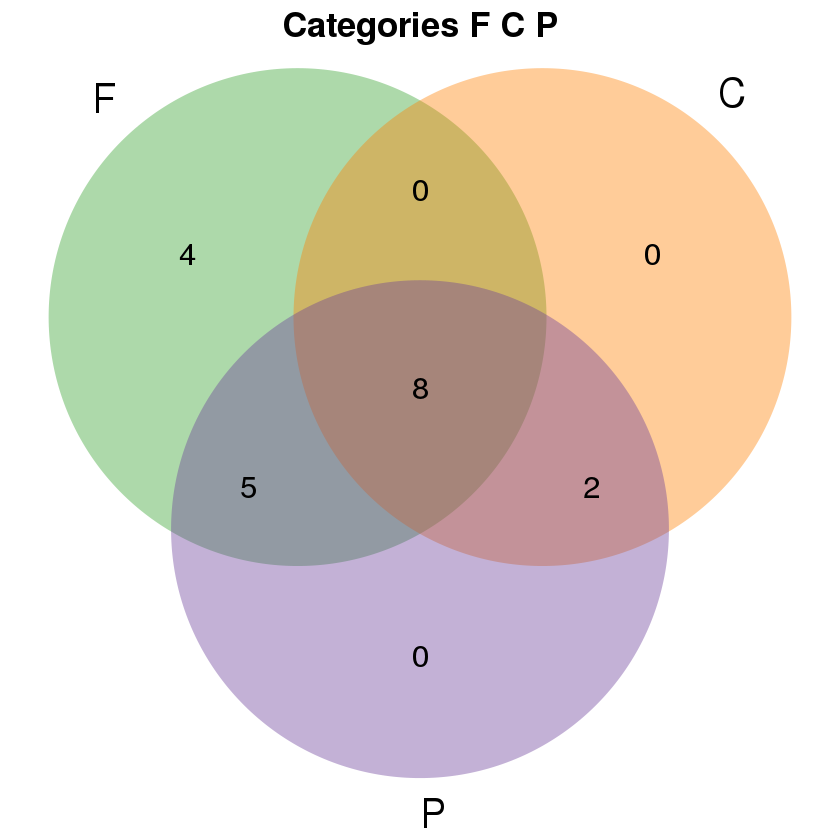

In [60]:
## solo visualizacion del diagrama de Venn en alta resolucion
plot=venn.diagram(list("F" = funcion,"C" = componente,"P"=proceso),
              fill = colors[c(24,28,30)], #c('yellow', 'purple', 'green'),
              main = "Categories F C P", main.cex = 1.7,main.fontface=2,
              alpha = c(0.4,0.4,0.4), cex = 1.5,cat.fontface = 1,cat.fontfamily = "sans",
              lty =0, filename=NULL, cat.cex=2, cat.dist = c(0.045, 0.02, 0.04),
              cat.just=list(c(0.4,1) , c(0,0) , c(0,0)))
grid.newpage()
grid.draw(plot)
## por cada ejecucion de este comando se genera un historial en el directorio,
## los archivos tienen extencioń .log, se pueden eliminar para no saturar el directorio.

In [61]:
## si esta satisfecho con el diagrama anterior, salvar la imagen con la siguiente orden
venn.diagram(list("F" = funcion,"C" = componente,"P"=proceso),
              fill =  colors[c(24,28,30)],#c('yellow', 'purple', 'green'),main = "Categories F C P", main.cex = 2,
              alpha = c(0.3, 0.3,0.3), cex = 2.5,cat.fontface = 2,cat.fontfamily = "sans",
              lty =0, filename='./plots/frecuencias_F_C_P_venn.tiff', cat.cex=2, cat.dist = c(0.045, 0.02, 0.05),
              cat.just=list(c(0.6,1) , c(0,0) , c(0,0)))
## Con este comando eliminamos los reportes que se generan cada vez que visualizamos o salvamos este grafico,  
delete_report=dir(pattern="[0-9].log",recursive=T,full.names=T) ## se guarda una lista de ficheros con extension .log
file.remove(delete_report) ## elimina todos los ficheros con extension .log

[1] 1

[1] TRUE TRUE

# Plot 4: Pie chart / Bar / Intersections plot of Molecular Function
## Pie Chart

In [62]:
## abrimos el fichero los resultados para proceso
aspect_f=read.csv("./results/Molecular_Function.csv")
head(aspect_f)

GO,Molecular.Function,Entry,Value
GO:0043167,ion binding,13,13
GO:0016301,kinase activity,5,5
GO:0003677,DNA binding,3,3
GO:0003700,DNA-binding transcription factor activity,3,3
GO:0016491,oxidoreductase activity,2,2
GO:0019899,enzyme binding,2,2


    * mutate: permite agregar una nueva columna o transformar una existente
    * pipe (%>%) es un operador que permite encadenar funciones, esto ayuda enormemente a mejorar la legibilidad del código

In [63]:
## solo estoy egraficando los primeros 15 terminos 
f_proportion= aspect_f%>% #preparamos la variable para aplicarle funciones
mutate(f.prop=Value/sum(Value))%>%
mutate(f.proportion=percent(Value/sum(Value)))%>% #obtenemos el "%" y lo agregamos al df inicial
mutate(Function=paste(Molecular.Function,f.proportion))%>% #fusionamos los terminos y el "%" para visualizacion
#convertimos los datos de la columna Process a una variable categorica (factor)
#porque inicialmente es reconocida como caracter y no permite ordenar los datos en el grafico
#con la siguiente orden condiguramos el orden de los datos en el grafico y la leyenda
mutate(Function=factor(Function,levels=Function[length(Function):0]))#[1:length(Process)] con esta orden se cambia el sentido de los datos en el grafico
# con "class" podemos ver la clase del objeto
head(f_proportion)

GO,Molecular.Function,Entry,Value,f.prop,f.proportion,Function
GO:0043167,ion binding,13,13,0.44827586,44.8%,ion binding 44.8%
GO:0016301,kinase activity,5,5,0.17241379,17.2%,kinase activity 17.2%
GO:0003677,DNA binding,3,3,0.10344828,10.3%,DNA binding 10.3%
GO:0003700,DNA-binding transcription factor activity,3,3,0.10344828,10.3%,DNA-binding transcription factor activity 10.3%
GO:0016491,oxidoreductase activity,2,2,0.06896552,6.9%,oxidoreductase activity 6.9%
GO:0019899,enzyme binding,2,2,0.06896552,6.9%,enzyme binding 6.9%


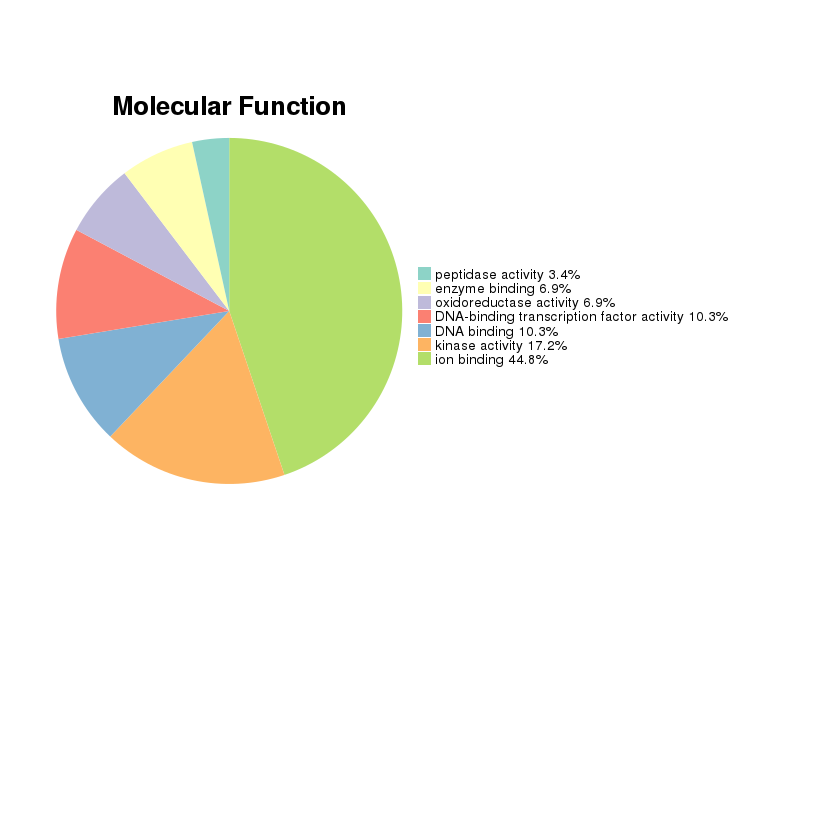

In [64]:
pie_molecular_function=ggplot(f_proportion,aes(x="",y=Value,fill=Function))+#introduccion de datos a graficar
pie_blank_theme+#elimina el color de fondo del grafico
geom_bar(width =1,stat ="identity")+#
coord_polar(theta="y",start=0)+#orientacion del grafico, empieza en 0°
scale_fill_manual(values=colors)+# colores del grafico
ggtitle("Molecular Function") + # agrega titulo al grafico
theme(legend.title=element_text(colour="white",size=7,face="bold"),#color, tamaño y formato del titulo de la leyenda
legend.text=element_text(colour="black",size=8),#color y tamaño del texto de la leyenda
plot.title=element_text(hjust=.5,size=15,margin=margin(b =-12,unit="pt"),face="bold"),# posicion,tamaño del titulo, y espacio entre el titulo y el grafico
legend.key.width=unit(0.3,"cm"),#ancho de la figura de la leyenda
legend.key.height=unit(0.3,"cm"),#alto de la figura de la leyenda, espacio entre el texto de la leyenda
legend.margin=margin(b = c(.1,-1), unit = "cm"),#distancia entre la leyenda y el grafico
legend.position= "right", #"bottom",
plot.margin=margin(.5,3,5,.1,"cm"))#margenes exteriores de todo el grafico
ggsave("./plots/Pie_Molecular_Function.png",width=7,height=7,dpi=600)#,compression='lzw')#guarda y reedita la figura guardada cada vez que se hacen cambios y se ejecuta el comando
pie_molecular_function
#display_png(file="/home/lalo/Escritorio/curso/plots/pie_biological_process.png")

## Bar Plot

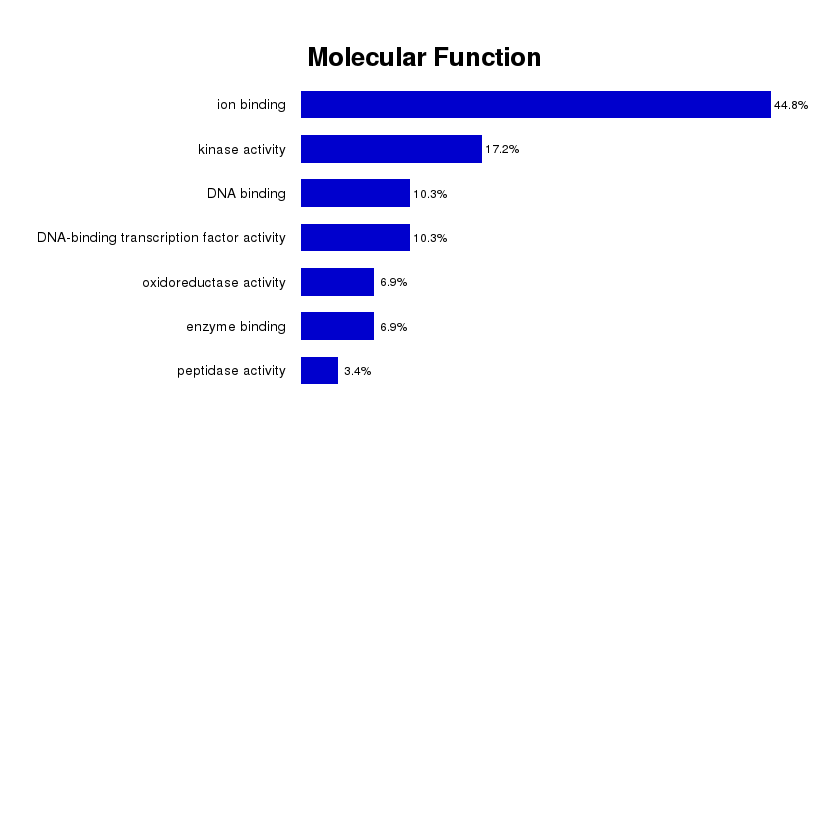

In [65]:
bar_molecular_function=ggplot(f_proportion,aes(x=Molecular.Function,y=f.prop))+#introduccion de datos a graficar
geom_bar(width=0.6,fill="mediumblue",stat ="identity")+#ancho y color de relleno de las barras
labs(x ="",y ="",title="Molecular Function")+#titulo de eje y, x y titulo de grafico
coord_flip()+#para crear graficos horizontales
bar_blank_theme+#elimina el color de fondo del grafico
#scale_x_discrete(limits=p_proportion$Biological.Process)+  #orden descendente del grafico
scale_x_discrete(limits=rev(f_proportion$Molecular.Function))+ #orden ascendente del grafico
geom_text(aes(x=Molecular.Function,y=f.prop+0.02,#configura el espacio entre la etiqueta de datos y el eje x  
label=percent(f.prop)),size=2.5)+#configura el valor de la etiqueta de datos y el tamaño de letra
theme(plot.title = element_text(hjust = .1,size = 15,face="bold"),#posocion y tamaño del titulo sobre el grafico
axis.text.y = element_text(size = 8,color="black"),#tamaño y color de texto de eje x
axis.ticks.length=unit(-.3, "cm"), #reduce la longitud de las marcas en la linea de escala de los ejes x y
plot.margin = margin(1,.5,9,.1, "cm"))#margenes exteriores del grafico
ggsave("./plots/Bar_Molecular_Function.png",width=7,height=7,dpi=600)#,compression='lzw')
#ggsave("./plots/bar_biological_process.pdf",width=7,height=7,dpi=600) #pdf
bar_molecular_function
#display_png(file="/home/lalo/Escritorio/curso/plots/bar_biological_process.png")

## Intersections

In [66]:
head(aspect_f)

GO,Molecular.Function,Entry,Value
GO:0043167,ion binding,13,13
GO:0016301,kinase activity,5,5
GO:0003677,DNA binding,3,3
GO:0003700,DNA-binding transcription factor activity,3,3
GO:0016491,oxidoreductase activity,2,2
GO:0019899,enzyme binding,2,2


In [67]:
# check.names=FALSE  hace que no se pierdan los dos puntos en los names de las columnas
up_function=read.csv("./results/Molecular_Function_matrix.csv",header=TRUE,check.names=FALSE)
head(up_function)

Entry,GO:0003677,GO:0003700,GO:0008233,GO:0016301,GO:0016491,GO:0019899,GO:0043167
1001070715,0,0,0,1,0,0,1
1001070719,1,1,0,0,0,0,0
1001070730,0,0,0,0,0,0,1
1001070731,0,0,0,0,0,1,1
1001070732,0,0,0,0,0,1,1
1001070735,0,0,0,0,0,0,1


In [68]:
## Seleccion de GO IDs de interes para ver sus intersecciones
go_function=as.character(aspect_f$GO)
go_function

[1] "GO:0043167" "GO:0016301" "GO:0003677" "GO:0003700" "GO:0016491"
[6] "GO:0019899" "GO:0008233"

png 
  2

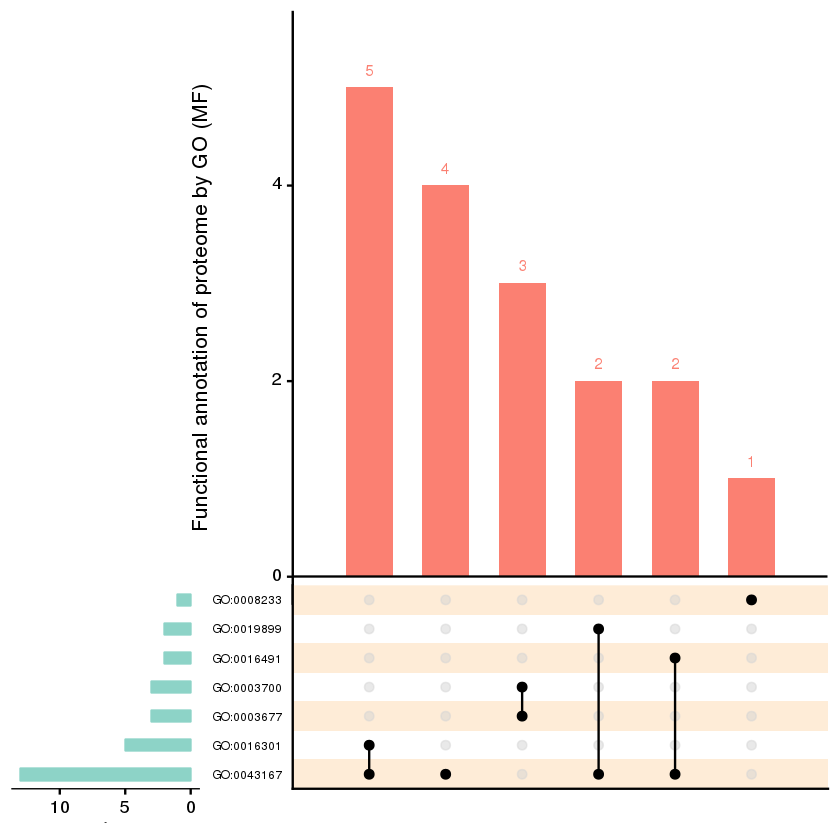

In [69]:
## intersecciones entre terminos, esto puede sustituir diagramas de ven con mas de 5 conjuntos
##
## c(intersection size title, intersection size tick labels, set size title, set size tick labels, set names, numbers above bars)
#      text.scale = c(1.5,1.5,0,1.5,1,1.5),
##
png(file="./plots/Function_Intersections.png",width = 10,height = 10,units = "in",res=500,bg="white")
up_fun= function() {
    upset(up_function,sets=go_function,
          sets.bar.color = colors[1],order.by = "freq",empty.intersections = NULL,point.size=2,
          mainbar.y.label="Functional annotation of proteome by GO (MF)",main.bar.color=colors[4],
          matrix.color="black",shade.color=colors[6],line.size=0.5,show.numbers = "yes",group.by = "degree",
          text.scale = c(1.5,1.5,0,1.5,1,1.5),
          matrix.dot.alpha = 0.5,mb.ratio = c(0.7, 0.3))
}
up_fun()
dev.off()
#
up_fun()

# Plot 5: Pie chart / Bar / Intersections plot of Biological process
## Pie Chart

In [70]:
## abrimos el fichero los resultados para proceso
aspect_p=read.csv("./results/Biological_Process.csv")
head(aspect_p)

GO,Biological.Process,Entry,Value
GO:0006464,cellular protein modification process,7,7
GO:0009058,biosynthetic process,3,3
GO:0034641,cellular nitrogen compound metabolic process,3,3
GO:0006259,DNA metabolic process,2,2
GO:0006950,response to stress,2,2
GO:0007165,signal transduction,2,2


    * mutate: permite agregar una nueva columna o transformar una existente
    * pipe (%>%) es un operador que permite encadenar funciones, esto ayuda enormemente a mejorar la legibilidad del código

In [71]:
## solo estoy egraficando los primeros 15 terminos 
p_proportion= aspect_p%>% #preparamos la variable para aplicarle funciones
mutate(p.prop=Value/sum(Value))%>%
mutate(p.proportion=percent(Value/sum(Value)))%>% #obtenemos el "%" y lo agregamos al df inicial
mutate(Process=paste(Biological.Process,p.proportion))%>% #fusionamos los terminos y el "%" para visualizacion
#convertimos los datos de la columna Process a una variable categorica (factor)
#porque inicialmente es reconocida como caracter y no permite ordenar los datos en el grafico
#con la siguiente orden condiguramos el orden de los datos en el grafico y la leyenda
mutate(Process=factor(Process,levels=Process[length(Process):0]))#[1:length(Process)] con esta orden se cambia el sentido de los datos en el grafico
# con "class" podemos ver la clase del objeto
head(p_proportion)

GO,Biological.Process,Entry,Value,p.prop,p.proportion,Process
GO:0006464,cellular protein modification process,7,7,0.29166667,29.2%,cellular protein modification process 29.2%
GO:0009058,biosynthetic process,3,3,0.12500000,12.5%,biosynthetic process 12.5%
GO:0034641,cellular nitrogen compound metabolic process,3,3,0.12500000,12.5%,cellular nitrogen compound metabolic process 12.5%
GO:0006259,DNA metabolic process,2,2,0.08333333,8.3%,DNA metabolic process 8.3%
GO:0006950,response to stress,2,2,0.08333333,8.3%,response to stress 8.3%
GO:0007165,signal transduction,2,2,0.08333333,8.3%,signal transduction 8.3%


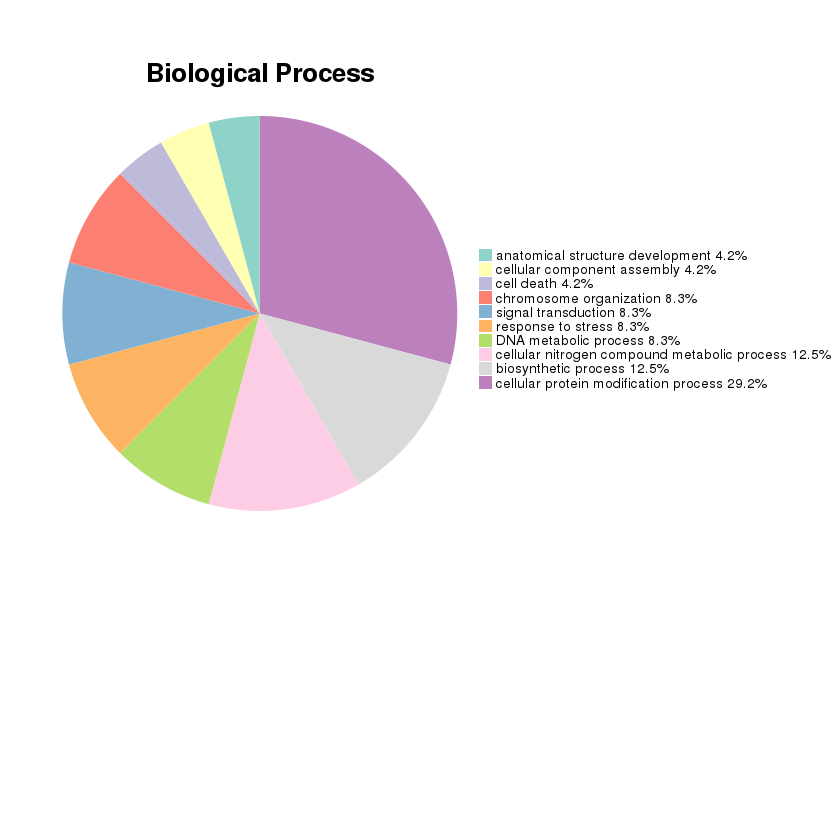

In [72]:
pie_biological_process=ggplot(p_proportion,aes(x="",y=Value,fill=Process))+#introduccion de datos a graficar
pie_blank_theme+#elimina el color de fondo del grafico
geom_bar(width =1,stat ="identity")+#
coord_polar(theta="y",start=0)+#orientacion del grafico, empieza en 0°
scale_fill_manual(values=colors)+# colores del grafico
ggtitle("Biological Process") + # agrega titulo al grafico
theme(legend.title=element_text(colour="white",size=7,face="bold"),#color, tamaño y formato del titulo de la leyenda
legend.text=element_text(colour="black",size=8),#color y tamaño del texto de la leyenda
plot.title=element_text(hjust=.5,size=15,margin=margin(b =-12,unit="pt"),face="bold"),# posicion,tamaño del titulo, y espacio entre el titulo y el grafico
legend.key.width=unit(0.3,"cm"),#ancho de la figura de la leyenda
legend.key.height=unit(0.3,"cm"),#alto de la figura de la leyenda
legend.margin=margin(b = c(.1,-1), unit = "cm"),#distancia entre la leyenda y el grafico
legend.position= "right", #"bottom",
plot.margin=margin(.5,1,5,.1,"cm"))#margenes exteriores de todo el grafico
ggsave("./plots/Pie_Biological_Process.png",width=7,height=7,dpi=600)#,compression='lzw')#guarda y reedita la figura guardada cada vez que se hacen cambios y se ejecuta el comando
pie_biological_process
#display_png(file="/home/lalo/Escritorio/curso/plots/pie_biological_process.png")

## Bar Plot

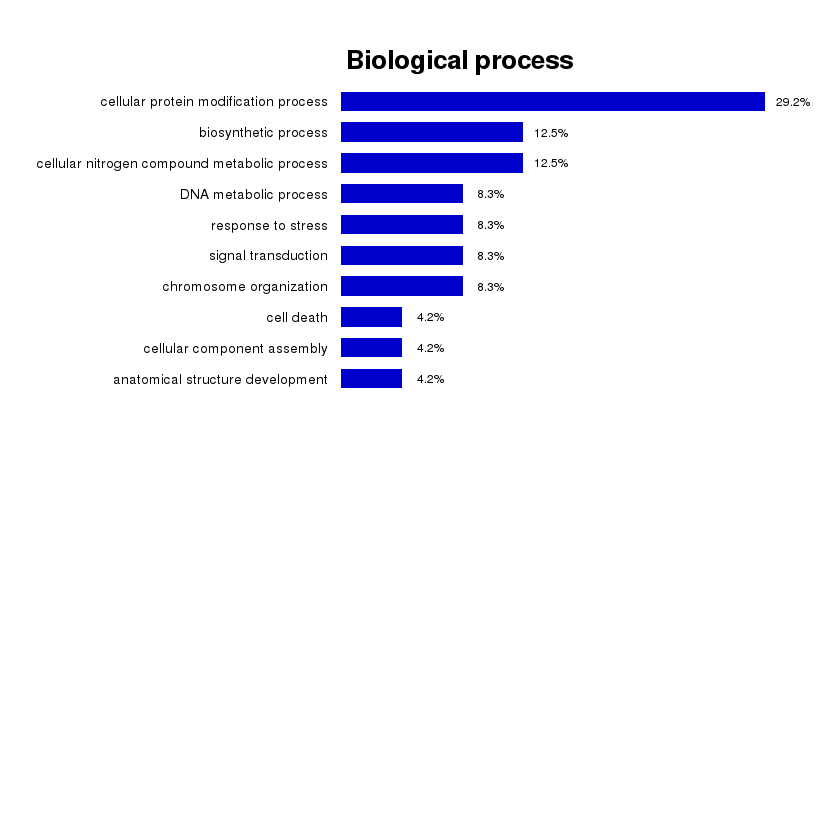

In [73]:
bar_biological_process=ggplot(p_proportion,aes(x=Biological.Process,y=p.prop))+#introduccion de datos a graficar
geom_bar(width=0.6,fill="mediumblue",stat ="identity")+#ancho y color de relleno de las barras
labs(x ="",y ="",title="Biological process")+#titulo de eje y, x y titulo de grafico
coord_flip()+#para crear graficos horizontales
bar_blank_theme+#elimina el color de fondo del grafico
#scale_x_discrete(limits=p_proportion$Biological.Process)+  #orden descendente del grafico
scale_x_discrete(limits=rev(p_proportion$Biological.Process))+ #orden ascendente del grafico
geom_text(aes(x=Biological.Process,y=p.prop+0.02,#configura el espacio entre la etiqueta de datos y el eje x  
label=percent(p.prop)),size=2.5)+#configura el valor de la etiqueta de datos y el tamaño de letra
theme(plot.title = element_text(hjust = .1,size = 15,face="bold"),#posocion y tamaño del titulo sobre el grafico
axis.text.y = element_text(size = 8,color="black"),#tamaño y color de texto de eje x
axis.ticks.length=unit(-.3, "cm"), #reduce la longitud de las marcas en la linea de escala de los ejes x y
plot.margin = margin(1,.5,9,.1, "cm"))#margenes exteriores del grafico
ggsave("./plots/Bar_Biological_Process.png",width=7,height=7,dpi=600)#,compression='lzw')
#ggsave("./plots/bar_biological_process.pdf",width=7,height=7,dpi=600) #pdf
bar_biological_process
#display_png(file="/home/lalo/Escritorio/curso/plots/bar_biological_process.png")

## Intersections

In [74]:
head(aspect_p)

GO,Biological.Process,Entry,Value
GO:0006464,cellular protein modification process,7,7
GO:0009058,biosynthetic process,3,3
GO:0034641,cellular nitrogen compound metabolic process,3,3
GO:0006259,DNA metabolic process,2,2
GO:0006950,response to stress,2,2
GO:0007165,signal transduction,2,2


In [75]:
# check.names=FALSE  hace que no se pierdan los dos puntos en los names de las columnas
up_process=read.csv("./results/Biological_Process_matrix.csv",header=TRUE,check.names=FALSE)
head(up_process)

Entry,GO:0006259,GO:0006464,GO:0006950,GO:0007165,GO:0008219,GO:0009058,GO:0022607,GO:0034641,GO:0048856,GO:0051276
1001070713,0,0,0,0,0,0,0,0,0,1
1001070714,0,0,0,0,0,0,0,0,0,1
1001070715,0,1,0,1,0,0,0,0,0,0
1001070719,0,0,0,0,0,1,0,1,0,0
1001070731,1,1,1,0,0,0,0,0,0,0
1001070732,1,1,1,0,0,0,0,0,0,0


In [76]:
## Seleccion de GO IDs de interes para ver sus intersecciones
go_process=as.character(aspect_p$GO[1:6])
go_process

[1] "GO:0006464" "GO:0009058" "GO:0034641" "GO:0006259" "GO:0006950"
[6] "GO:0007165"

png 
  2

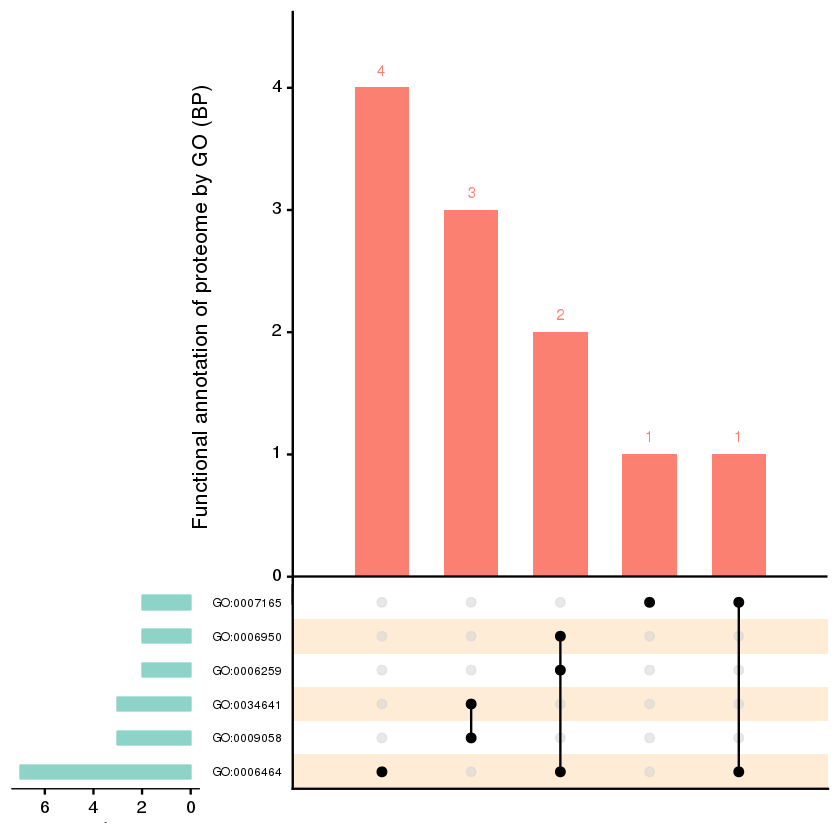

In [77]:
## intersecciones entre términos, esto puede sustituir diagramas de ven con más de 5 conjuntos
png(file="./plots/Process_Intersections.png",width = 10,height = 10,units = "in",res=500,bg="white")
up_proc= function() {
    upset(up_process,sets=go_process,
          sets.bar.color = colors[1],order.by = "freq",empty.intersections = NULL,point.size=2,
          mainbar.y.label="Functional annotation of proteome by GO (BP)",main.bar.color=colors[4],
          matrix.color="black",shade.color=colors[6],line.size=0.5,show.numbers = "yes",group.by = "degree",
          text.scale = c(1.5,1.5,0,1.5,1,1.5),
          matrix.dot.alpha = 0.5,mb.ratio = c(0.7, 0.3))
}
up_proc()
dev.off()
#
up_proc()

# Plot 6: Pie chart / Bar / Intersections plot of Cellular Component
## Pie Chart

In [78]:
## abrimos el fichero los resultados para proceso
aspect_c=read.csv("./results/Cellular_Component.csv")
head(aspect_c)

GO,Cellular.Component,Entry,Value
GO:0005634,nucleus,5,5
GO:0000228,nuclear chromosome,2,2
GO:0005730,nucleolus,2,2
GO:0032991,protein-containing complex,2,2
GO:0005622,intracellular,1,1
GO:0005737,cytoplasm,1,1


    * mutate: permite agregar una nueva columna o transformar una existente
    * pipe (%>%) es un operador que permite encadenar funciones, esto ayuda enormemente a mejorar la legibilidad del código

In [79]:
## solo estoy egraficando los primeros 15 terminos 
c_proportion= aspect_c%>% #preparamos la variable para aplicarle funciones
mutate(c.prop=Value/sum(Value))%>%
mutate(c.proportion=percent(Value/sum(Value)))%>% #obtenemos el "%" y lo agregamos al df inicial
mutate(Component=paste(Cellular.Component,c.proportion))%>% #fusionamos los terminos y el "%" para visualizacion
#convertimos los datos de la columna Process a una variable categorica (factor)
#porque inicialmente es reconocida como caracter y no permite ordenar los datos en el grafico
#con la siguiente orden condiguramos el orden de los datos en el grafico y la leyenda
mutate(Component=factor(Component,levels=Component[length(Component):0]))#[1:length(Process)] con esta orden se cambia el sentido de los datos en el grafico
# con "class" podemos ver la clase del objeto
head(c_proportion)

GO,Cellular.Component,Entry,Value,c.prop,c.proportion,Component
GO:0005634,nucleus,5,5,0.38461538,38.5%,nucleus 38.5%
GO:0000228,nuclear chromosome,2,2,0.15384615,15.4%,nuclear chromosome 15.4%
GO:0005730,nucleolus,2,2,0.15384615,15.4%,nucleolus 15.4%
GO:0032991,protein-containing complex,2,2,0.15384615,15.4%,protein-containing complex 15.4%
GO:0005622,intracellular,1,1,0.07692308,7.7%,intracellular 7.7%
GO:0005737,cytoplasm,1,1,0.07692308,7.7%,cytoplasm 7.7%


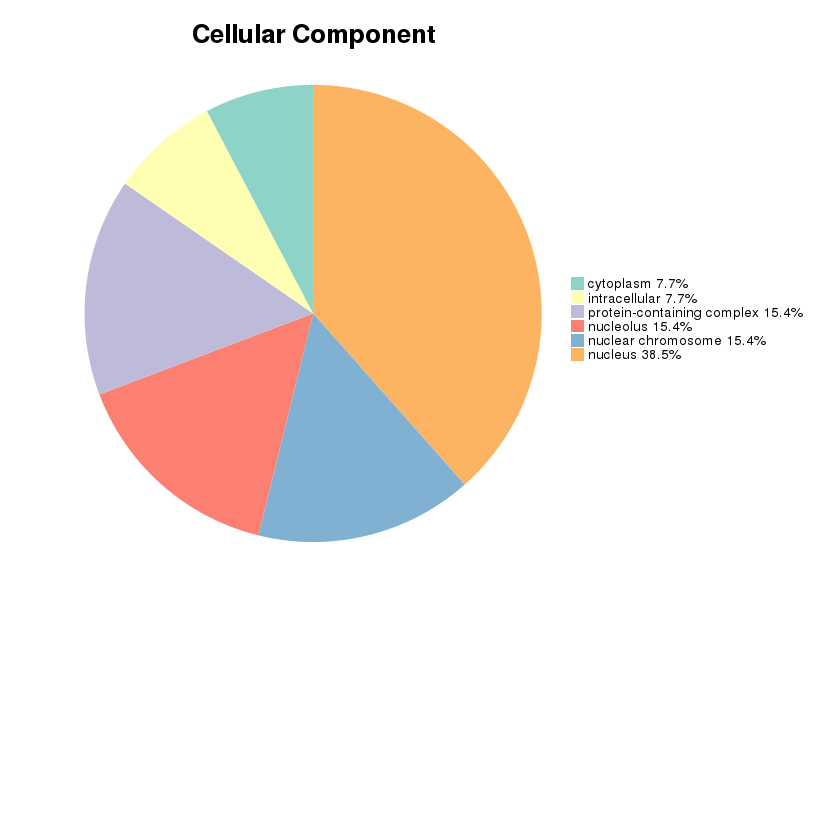

In [80]:
pie_cellular_component=ggplot(c_proportion,aes(x="",y=Value,fill=Component))+#introduccion de datos a graficar
pie_blank_theme+#elimina el color de fondo del grafico
geom_bar(width =1,stat ="identity")+#
coord_polar(theta="y",start=0)+#orientacion del grafico, empieza en 0°
scale_fill_manual(values=colors)+# colores del grafico
ggtitle("Cellular Component") + # agrega titulo al grafico
theme(legend.title=element_text(colour="white",size=7,face="bold"),#color, tamaño y formato del titulo de la leyenda
legend.text=element_text(colour="black",size=8),#color y tamaño del texto de la leyenda
plot.title=element_text(hjust=.5,size=15,margin=margin(b =-12,unit="pt"),face="bold"),# posicion,tamaño del titulo, y espacio entre el titulo y el grafico
legend.key.width=unit(0.3,"cm"),#ancho de la figura de la leyenda
legend.key.height=unit(0.3,"cm"),#alto de la figura de la leyenda
legend.margin=margin(b = c(.1,-1), unit = "cm"),#distancia entre la leyenda y el grafico
legend.position= "right", #"bottom",
plot.margin=margin(.5,1,5,.1,"cm"))#margenes exteriores de todo el grafico
ggsave("./plots/Pie_Cellular_Component.png",width=7,height=7,dpi=600)#,compression='lzw')#guarda y reedita la figura guardada cada vez que se hacen cambios y se ejecuta el comando
pie_cellular_component
#display_png(file="/home/lalo/Escritorio/curso/plots/pie_biological_process.png")

## Bar

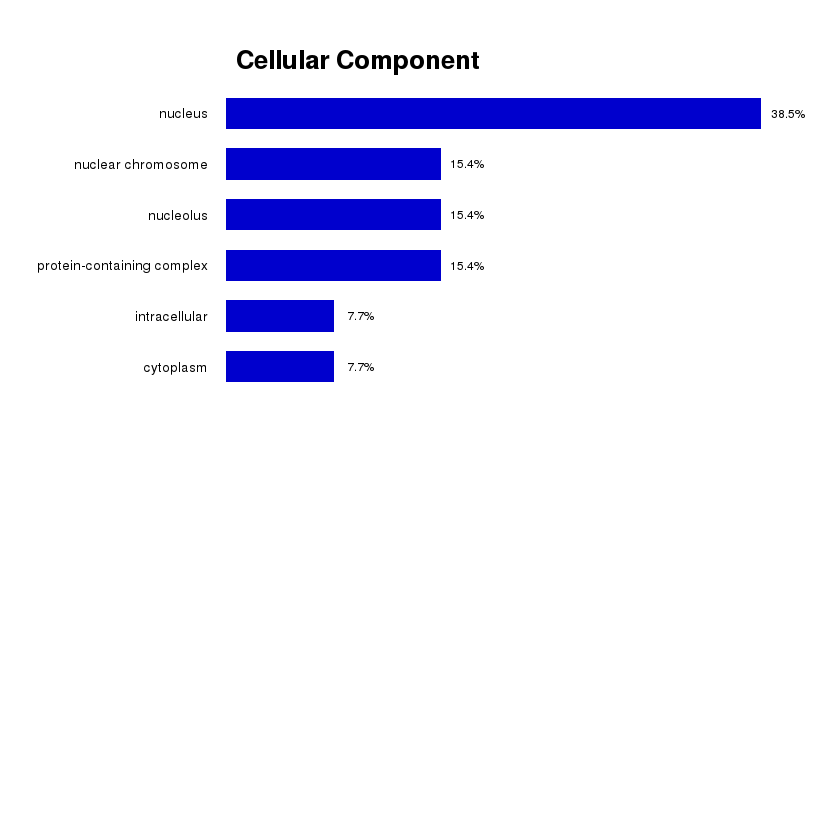

In [81]:
bar_cellular_component=ggplot(c_proportion,aes(x=Cellular.Component,y=c.prop))+#introduccion de datos a graficar
geom_bar(width=0.6,fill="mediumblue",stat ="identity")+#ancho y color de relleno de las barras
labs(x ="",y ="",title="Cellular Component")+#titulo de eje y, x y titulo de grafico
coord_flip()+#para crear graficos horizontales
bar_blank_theme+#elimina el color de fondo del grafico
#scale_x_discrete(limits=p_proportion$Biological.Process)+  #orden descendente del grafico
scale_x_discrete(limits=rev(c_proportion$Cellular.Component))+ #orden ascendente del grafico
geom_text(aes(x=Cellular.Component,y=c.prop+0.02,#configura el espacio entre la etiqueta de datos y el eje x  
label=percent(c.prop)),size=2.5)+#configura el valor de la etiqueta de datos y el tamaño de letra
theme(plot.title = element_text(hjust = .1,size = 15,face="bold"),#posocion y tamaño del titulo sobre el grafico
axis.text.y = element_text(size = 8,color="black"),#tamaño y color de texto de eje x
axis.ticks.length=unit(-.3, "cm"), #reduce la longitud de las marcas en la linea de escala de los ejes x y
plot.margin = margin(1,.5,9,.1, "cm"))#margenes exteriores del grafico
ggsave("./plots/Bar_Cellular_Component.png",width=7,height=7,dpi=600)#,compression='lzw')
#ggsave("./plots/bar_biological_process.pdf",width=7,height=7,dpi=600) #pdf
bar_cellular_component
#display_png(file="/home/lalo/Escritorio/curso/plots/bar_biological_process.png")

## Intersections

In [82]:
# check.names=FALSE  hace que no se pierdan los dos puntos en los names de las columnas
up_component=read.csv("./results/Cellular_Component_matrix.csv",header=TRUE,check.names=FALSE)
head(up_component)

Entry,GO:0000228,GO:0005622,GO:0005634,GO:0005730,GO:0005737,GO:0032991
1001070713,1,0,0,0,0,1
1001070714,1,0,0,0,0,1
1001070715,0,1,0,0,0,0
1001070719,0,0,1,0,0,0
1001070731,0,0,1,1,0,0
1001070732,0,0,1,1,0,0


In [83]:
head(aspect_c)

GO,Cellular.Component,Entry,Value
GO:0005634,nucleus,5,5
GO:0000228,nuclear chromosome,2,2
GO:0005730,nucleolus,2,2
GO:0032991,protein-containing complex,2,2
GO:0005622,intracellular,1,1
GO:0005737,cytoplasm,1,1


In [84]:
## Seleccion de GO IDs de interes para ver sus intersecciones
go_component=as.character(aspect_c$GO[1:6])
go_component

[1] "GO:0005634" "GO:0000228" "GO:0005730" "GO:0032991" "GO:0005622"
[6] "GO:0005737"

png 
  2

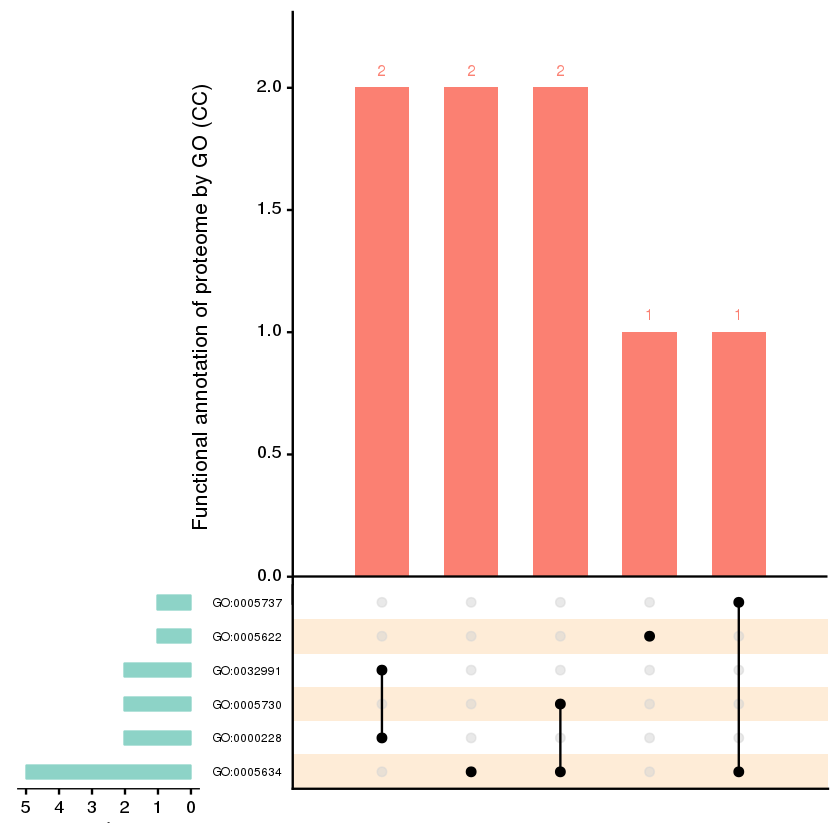

In [85]:
## intersecciones entre términos, esto puede sustituir diagramas de ven con más de 5 conjuntos
png(file="./plots/Component_Intersections.png",width = 10,height = 10,units = "in",res=500,bg="white")
up_comp=function(){
    upset(up_component,sets=go_component,
          sets.bar.color = colors[1],order.by = "freq",empty.intersections = NULL,point.size=2,
          mainbar.y.label="Functional annotation of proteome by GO (CC)",main.bar.color=colors[4],
          matrix.color="black",shade.color=colors[6],line.size=0.5,show.numbers = "yes",group.by = "degree",
          text.scale = c(1.5,1.5,0,1.5,1,1.5),
          matrix.dot.alpha = 0.5,mb.ratio = c(0.7, 0.3))
}
up_comp()
dev.off()
#
up_comp()